# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston

boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [2]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [3]:
y = pd.DataFrame(boston['target'], columns=['price'])
y.head(10)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
325,0.19186,0.0,7.38,0.0,0.4930,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
335,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
56,0.02055,85.0,0.74,0.0,0.4100,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
437,15.17720,0.0,18.10,0.0,0.7400,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45
409,14.43830,0.0,18.10,0.0,0.5970,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78


Масштабируйте данные с помощью StandardScaler.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

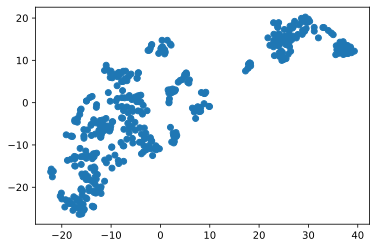

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

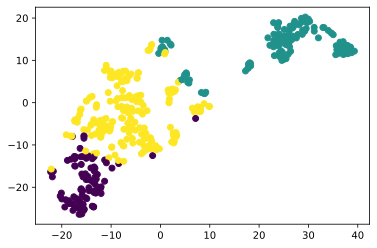

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter= 100, random_state=42)

labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [9]:
print(y_train[labels_train == 0]['price'].mean())
print(y_train[labels_train == 1]['price'].mean())
print(y_train[labels_train == 2]['price'].mean())

27.788372093023252
16.165354330708666
24.958115183246072


In [10]:
print(X_train[labels_train == 0]['CRIM'].mean())
print(X_train[labels_train == 1]['CRIM'].mean())
print(X_train[labels_train == 2]['CRIM'].mean())

0.07356558139534886
10.797028425196853
0.42166020942408367


# *Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

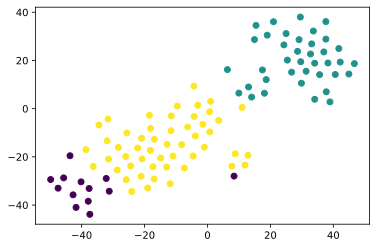

In [11]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test_tsne = tsne.fit_transform(X_test_scaled)

labels_train = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)

plt.show()

In [12]:
print(y_test[labels_train == 0]['price'].mean())
print(y_test[labels_train == 1]['price'].mean())
print(y_test[labels_train == 2]['price'].mean())

34.55384615384615
16.710526315789473
21.71764705882353


In [13]:
print(X_test[labels_train == 0]['CRIM'].mean())
print(X_test[labels_train == 1]['CRIM'].mean())
print(X_test[labels_train == 2]['CRIM'].mean())

0.08308461538461537
9.419181842105264
0.22250117647058823
